## Import dependencies

In [1]:
import tensorflow as tf
# Numpy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

## Generate data
#### 사인 값 데이터 생성

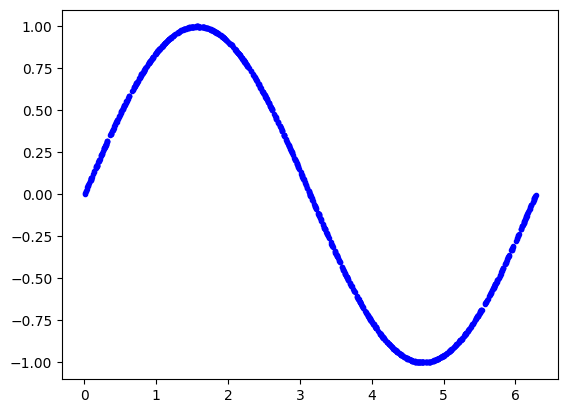

In [2]:
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
# 사인파 진폭의 범위인 0~2π 내에서 균일하게 분포된 난수 집합을 생성한다.
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

## Add some noise
잡음 속에서 패턴을 선별하는 모델을 생성하기 위해 데이터에 임의로 노이즈 추가

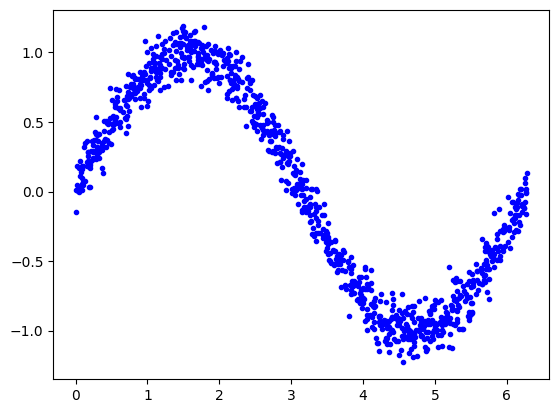

In [3]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

## Split our data

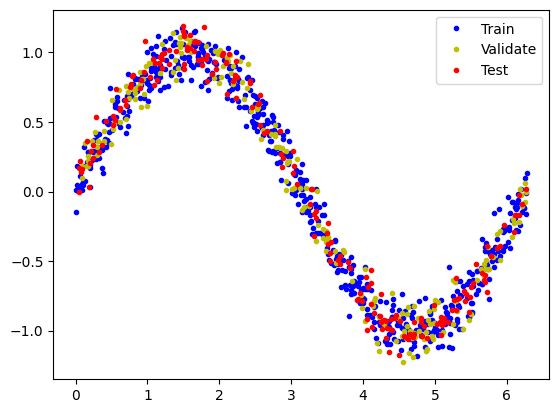

In [4]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20% : 훈련에 60%, 테스트에 20%, 검증에 20% 사용
# will be used for validation. Calculate the indices of each section. : 각 항목의 인덱스 계산
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be : np.split의 두 번째 인수는 데이터가 분할되는 인덱스 배열
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly : 분할한 데이터를 합쳤을 때 원래 사이즈와 같은지 다시 확인
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

## Design a model
#### 입력값(x)을 사용하여 숫자 출력값(사인 x)을 예측하는 모델 구축 : 회귀 문제

In [5]:
# We'll use Keras to create a simple model architecture
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


2023-03-19 12:25:28.586367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 12:25:28.586460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Train the model

In [6]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                    validation_data=(x_validate, y_validate))

Epoch 1/1000


2023-03-19 12:25:28.687082: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-19 12:25:28.802884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 1s 8ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
25/38 [==================>...........] - ETA: 0s - loss: 0.5027 - mae: 0.6284

2023-03-19 12:25:29.180695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 0s 6ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.2723 - mae: 0.4563 - val_loss: 0.2760 - val_mae: 0.4501
Epoch 9/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.2525 - mae: 0

## Check the training metrics

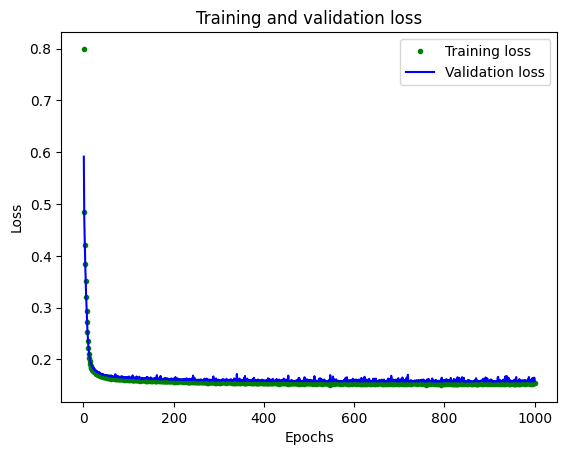

In [7]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Look closer at the data
#### 처음 몇 에폭 동안 손실이 급격히 떨어지기 때문에, 그래프의 나머지 부분을 읽기가 매우 어려움.
#### 그러므로, 처음 100개의 에폭을 건너뛰고 시각화 진행

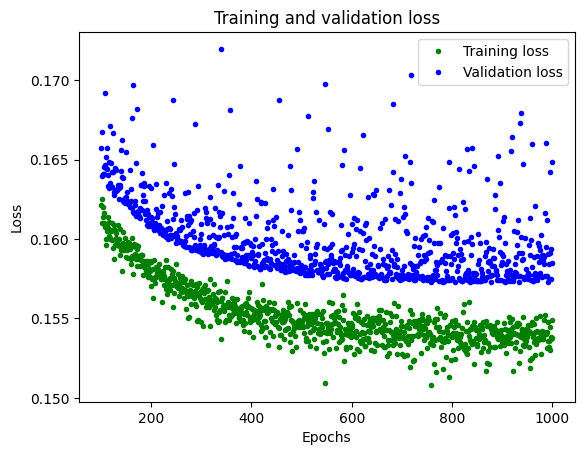

In [8]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Further metrics
#### 평균 절대 오차 그래프를 통해 평균적으로 훈련 데이터가 검증 데이터보다 오류가 낮음을 확인
#### 즉, 네트워크가 과적합됐거나 훈련 데이터를 너무 학습하여 새로운 데이터를 효과적으로 예측할 수 없음을 의미.
#### 평균 절대 오차 값음 0.31 정도로 상당히 높으며, 모델의 일부 예측이 0.31 이상 잘못됐음을 나타냄.
#### 예상 값의 크기는 -1 에서 +1까지이므로 0.31의 오차는 사인파를 정확하게 모델링할 수 없음을 뜻함.

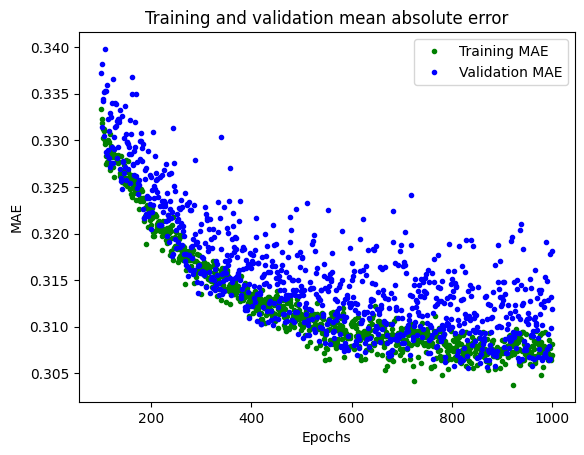

In [9]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

#### 훈련 데이터에 대한 네트워크 예측을 기댓값과 비교 진행

19/19 [==============================] - 0s 2ms/step


2023-03-19 12:29:00.555797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


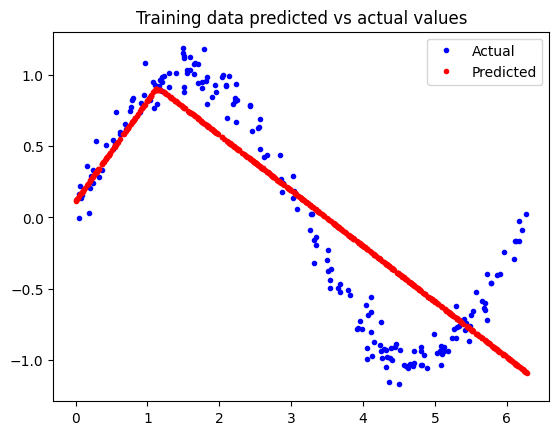

In [10]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train) # 훈련 데이터의 모든 x값 추론

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

#### 예측이 매우 선형적이며, 데이터에 매우 대략적으로만 모델이 생성됨을 확인 함.
#### 해당 모델 적합도로는 사인파 함수의 전체 복잡성을 학습할 수 없음.
#### 따라서, 모델을 더 크게 만들어서 성능을 향상시킬 것임!

## Change our model

In [11]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [12]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                    validation_data=(x_validate, y_validate))

Epoch 1/600
10/38 [======>.......................] - ETA: 0s - loss: 1.1071 - mae: 0.8937

2023-03-19 12:29:00.818367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 1s 9ms/step - loss: 0.7137 - mae: 0.7311 - val_loss: 0.4662 - val_mae: 0.6012
Epoch 2/600
21/38 [===============>..............] - ETA: 0s - loss: 0.4107 - mae: 0.5566

2023-03-19 12:29:01.217647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 0s 6ms/step - loss: 0.3890 - mae: 0.5420 - val_loss: 0.3745 - val_mae: 0.5205
Epoch 3/600
38/38 [==============================] - 0s 6ms/step - loss: 0.3183 - mae: 0.4884 - val_loss: 0.3078 - val_mae: 0.4784
Epoch 4/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2622 - mae: 0.4452 - val_loss: 0.2525 - val_mae: 0.4323
Epoch 5/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2180 - mae: 0.4095 - val_loss: 0.2074 - val_mae: 0.3926
Epoch 6/600
38/38 [==============================] - 0s 6ms/step - loss: 0.1853 - mae: 0.3783 - val_loss: 0.1887 - val_mae: 0.3702
Epoch 7/600
38/38 [==============================] - 0s 6ms/step - loss: 0.1667 - mae: 0.3572 - val_loss: 0.1682 - val_mae: 0.3546
Epoch 8/600
38/38 [==============================] - 0s 6ms/step - loss: 0.1532 - mae: 0.3402 - val_loss: 0.1625 - val_mae: 0.3370
Epoch 9/600
38/38 [==============================] - 0s 6ms/step - loss: 0.1426 - mae: 0.3238 -

## Evaluate our new model

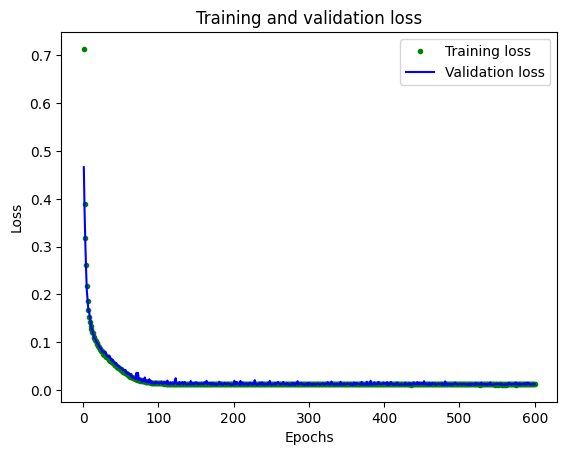

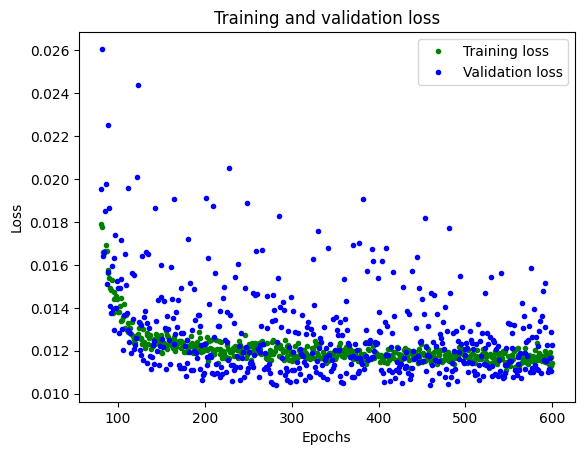

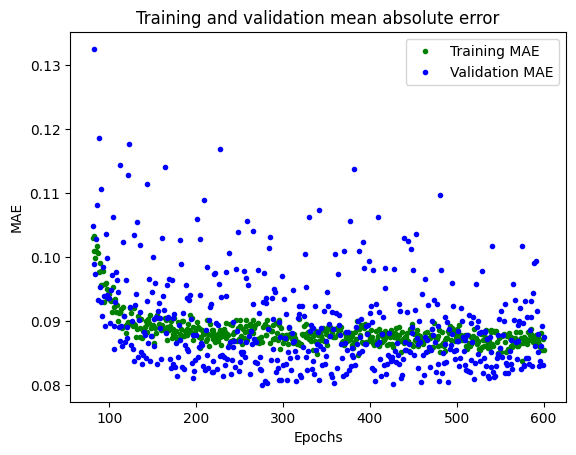

In [13]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 80

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

#### 그래프를 통해 아래와 같이 알 수 있다.
-  훈련보다 검증의 지표가 훨씬 더 좋다. 즉, 네트워크가 과적합되지 않았다.
- 전제 손실과 평균 절대 오차가 이전 네트워크보다 훨씬 나아졌다.
#### 검증 데이터만 보면 모델이 훌륭하게 작동하는 것처럼 보이지만, 이를 확인하려면 최종 테스트를 실행해야 함.

## Test

7/7 [==============================] - 0s 2ms/step


2023-03-19 12:31:23.954681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


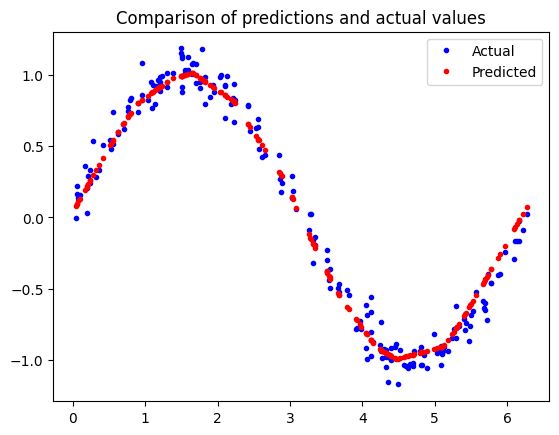

In [14]:
# Calculate and print the loss on our test dataset : 테스트 데이터셋의 손실 계산과 출력 
loss = model_2.evaluate(x_test, y_test) 

# Make predictions based on our test dataset : 테스트 데이터셋 기반으로 예측
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

## Convert to TensorFlow Lite
model_1. 텐서플로 라이트 플랫버퍼 형식으로 변환되지만 최적화 적용 X <br/>
model_2. 양자화 진행

In [15]:
# Convert the model to the TensorFlow Lite format without quantization : 양자화 없이 모델을 텐서플로 라이트 형식으로 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk : 모델을 디스크에 저장
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization : 양자화하여 모델을 텐서플로 라이트 형식으로 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations, : 양자화를 포함한 기본 최적화 수행
# which includes quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/40/c3b3k6gx3fgb1p9w_gczw1lc0000gn/T/tmp5sd6zywv/assets
INFO:tensorflow:Assets written to: /var/folders/40/c3b3k6gx3fgb1p9w_gczw1lc0000gn/T/tmpiq49axb4/assets


2023-03-19 12:31:24.409512: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-19 12:31:24.409523: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-19 12:31:24.409839: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/40/c3b3k6gx3fgb1p9w_gczw1lc0000gn/T/tmp5sd6zywv
2023-03-19 12:31:24.410388: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-03-19 12:31:24.410393: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/40/c3b3k6gx3fgb1p9w_gczw1lc0000gn/T/tmp5sd6zywv
2023-03-19 12:31:24.411728: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-03-19 12:31:24.412032: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-03-19 12:31:24.425961: I tensorflow/cc/saved_model/loader.

2976

## Test the converted models

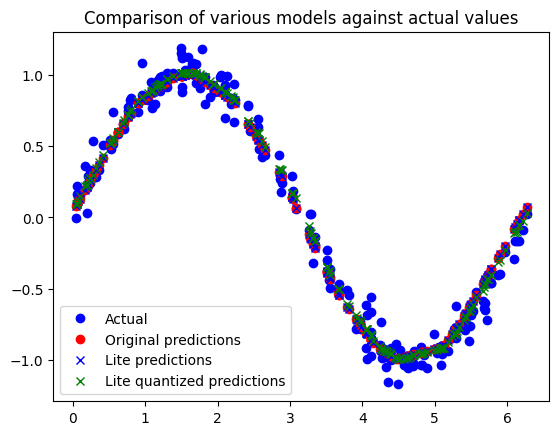

In [16]:
# Instantiate an interpreter for each model : 각 모델 인터프리터 인스턴스화
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model : 각 모델에 메모리 할당
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors : 입력과 결과 텐서 인덱스 가져오기
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results : 결과를 저장하기 위한 배열 생성
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays : 각 값에 대해 각 모델의 인터프리터를 실행하고 결과를 배열에 저장
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value : 현재 x값을 감싸고 있는 2차원 텐서 생성
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference : 추론 실행
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

#### 모델 크기 비교

In [17]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 3140 bytes
Quantized model is 2976 bytes
Difference is 164 bytes


## Write to a C file
마이크로컨트롤러용 텐서플로 라이트와 함께 사용할 모델을 준비하는 마지막 단계는 모델을 애플리케이션에 포함할 수 있는 C 소스 파일로 변환하는 것이다.

대부분의 마이크로컨트롤러에는 파일 시스템이 없다. 설사 있다고 해도 디스크에서 모델을 로드하는 데 필요한 추가 코드는 제한된 공간 때문에 낭비된다. 
그 대신 훌륭한 방식으로 <b>바이너리</b>에 포함시켜 메모리에 직접 로드할 수 있는 C 소스 파일 형식으로 모델을 제공할 수 있다.

파일에서 모델은 바이트 배열로 정의되며 ```xxd```라는 편리한 유닉스 도구가 있어 주어진 파일을 필요한 형식으로 변환할 수 있다.

양자화된 모델에서 xxd를 실행하고 출력값을 ```"sine_model_quantized.cc"```라는 파일에 써보자!!!


In [18]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

zsh:1: command not found: apt-get
unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x88, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00, 0xac, 0x03, 0x00, 0x00,
  0xbc, 0x03, 0x00, 0x00, 0x18, 0x0b, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x02, 0xfc, 0xff, 0xff,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x94, 0xff, 0xff, 0xff, 0x0b, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x34, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xe2, 0xfc, 0xff, 0xff, 0x04